In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import re
from glob import glob
from math import log
import numpy as np
from collections import defaultdict, Counter

In [3]:
!unzip "/content/drive/MyDrive/cta_seg.zip"

unzip:  cannot find or open /content/drive/MyDrive/cta_seg.zip, /content/drive/MyDrive/cta_seg.zip.zip or /content/drive/MyDrive/cta_seg.zip.ZIP.


In [17]:
path = "/content/drive/MyDrive/STUDY_MY/Programming/cta_seg/"

In [11]:
print(len(os.listdir(path))//2)

1166


In [19]:
f = open("corpus.txt", "w")
for seg in glob(f"{path}*.seg_Y1"):
  with open(seg, encoding="cp1251") as y1:
    y = y1.readlines()

  words = [line.strip().split(",")[2] for line in y[7:]]

  sentence = ""
  for i in range(len(words)-1):
    if words[i] != "":
      sentence += re.sub("\[[\+\-]\]", "", words[i])
      sentence += " "
      
  f.write(f"<s> <s> {sentence}</s>\n")

f.close()

# Bare n-grams

In [20]:
unigrams = {}
with open("corpus.txt") as f:
  corpus = f.readlines()

corpus = corpus[0:len(corpus)//10]

wordlist = []
for i in corpus:
  wordlist += i.strip().split()

wordset = set(wordlist)
for word in wordset:
  unigrams[word] = -log(wordlist.count(word)/len(wordlist), 2)
  
print(unigrams)

{'кровати': 10.651948610723448, 'дозваться': 10.651948610723448, 'улыбку': 10.651948610723448, 'колени': 10.651948610723448, 'чтобы': 9.06698611000229, 'тона': 10.651948610723448, 'закончила': 10.651948610723448, 'детская': 10.651948610723448, 'нет': 10.651948610723448, 'оглушенный': 10.651948610723448, 'головы': 10.651948610723448, 'шлепнула': 10.651948610723448, 'газетный': 10.651948610723448, 'паша': 10.651948610723448, 'подошла': 10.651948610723448, 'тебя': 9.06698611000229, 'лечение': 10.651948610723448, 'трамвайчик': 10.651948610723448, 'какое': 10.651948610723448, 'показать': 10.651948610723448, 'тогда': 10.651948610723448, 'отнимая': 10.651948610723448, 'эту': 10.651948610723448, 'вылазка': 10.651948610723448, 'часто': 10.651948610723448, 'дочиста': 10.651948610723448, 'таня': 9.06698611000229, 'мгновенны': 10.651948610723448, 'стоял': 10.651948610723448, 'говорю': 10.651948610723448, 'соображает': 10.651948610723448, 'серьезное': 10.651948610723448, 'больна': 10.65194861072344

In [21]:
len(corpus)

116

In [22]:
same_first_word = defaultdict(list)
doubles = []
bigrams = {}

for i in range(len(corpus)-1):
  words = corpus[i].strip().split()
  for j in range(len(words)-1):
    doubles.append(f"{words[j]} {words[j+1]}")

doubleset = set(doubles)

for double in doubleset:
  same_first_word[double.split()[0]].append(double)

for word in same_first_word:
  for double in same_first_word[word]:
    bigrams[double] = -log(doubles.count(double)/len(same_first_word[word]), 2)

print(bigrams)

{'день из': -0.0, 'потом были': -0.0, 'командировку утвердили': -0.0, 'веселясь рассказывали': -0.0, '<s> все': 4.7369655941662066, '<s> дмитриев': 4.321928094887363, '<s> дело': 6.321928094887362, '<s> иногда': 6.321928094887362, '<s> какая': 6.321928094887362, '<s> едва': 6.321928094887362, '<s> пока': 6.321928094887362, '<s> в': 5.321928094887363, '<s> боже': 6.321928094887362, '<s> к': 6.321928094887362, '<s> невозможно': 6.321928094887362, '<s> не': 5.321928094887363, '<s> но': 4.321928094887363, '<s> вы': 5.321928094887363, '<s> <s>': -0.523561956057013, '<s> исчезают': 6.321928094887362, '<s> чудно': 6.321928094887362, '<s> обычно': 6.321928094887362, '<s> как': 6.321928094887362, '<s> командировку': 6.321928094887362, '<s> лишь': 6.321928094887362, '<s> ехали': 6.321928094887362, '<s> даже': 6.321928094887362, '<s> она': 4.321928094887363, '<s> ты': 6.321928094887362, '<s> нас': 6.321928094887362, '<s> из-под': 6.321928094887362, '<s> что-то': 6.321928094887362, '<s> ему': 6.32

In [ ]:
same_first_words = defaultdict(list)
triples = []
trigrams = {}

for i in range(len(corpus)-1):
  words = corpus[i].strip().split()
  for j in range(len(words)-2):
    triples.append(f"{words[j]} {words[j+1]} {words[j+2]}")

tripleset = set(triples)

for triple in tripleset:
  same_first_words[triple.rsplit(maxsplit=1)[0]].append(triple)

for word in same_first_words:
  for triple in same_first_words[word]:
    trigrams[triple] = -log(triples.count(triple)/len(same_first_words[word]), 2)

print(trigrams)

{'как постороннего </s>': -0.0, 'сник не мог': -0.0, 'полы блестели рамы': -0.0, 'что ему ехать': -0.0, 'здоровье ксении федоровны': -0.0, '<s> <s> чем': 6.303780748177103, '<s> <s> ни': 6.303780748177103, '<s> <s> пришла': 6.303780748177103, '<s> <s> только': 6.303780748177103, '<s> <s> до': 6.303780748177103, '<s> <s> из': 6.303780748177103, '<s> <s> действительно': 6.303780748177103, '<s> <s> на': 6.303780748177103, '<s> <s> его': 6.303780748177103, '<s> <s> деньги': 6.303780748177103, '<s> <s> прошло': 6.303780748177103, '<s> <s> помолчав': 6.303780748177103, '<s> <s> за': 6.303780748177103, '<s> <s> после': 6.303780748177103, '<s> <s> говори': 6.303780748177103, '<s> <s> так': 6.303780748177103, '<s> <s> ну': 5.303780748177103, '<s> <s> отцу': 6.303780748177103, '<s> <s> кичливость': 6.303780748177103, '<s> <s> этот': 6.303780748177103, '<s> <s> дмитриев': 3.9818526532897405, '<s> <s> глаза': 6.303780748177103, '<s> <s> Сѓ': 6.303780748177103, '<s> <s> мне': 6.303780748177103, '<s

#  Laplace smoothing


In [ ]:
unigrams_laplace = {}
# with open("corpus.txt") as f:
#   corpus = f.readlines()

wordlist = []
for i in corpus:
  wordlist += i.strip().split()

wordset = np.array(list(set(wordlist)))
for word in wordset:
  unigrams_laplace[word] = -log((wordlist.count(word) + 1)/(len(wordlist) + len(wordset)), 2)

print(unigrams_laplace)

{'красновато': 10.394998514501673, 'шутку': 10.394998514501673, 'были': 10.394998514501673, 'не': 6.307535673251332, 'всегда': 10.394998514501673, 'сочувствие': 10.394998514501673, 'тебе': 10.394998514501673, 'виктора': 10.394998514501673, 'мы': 9.810036013780516, 'нравилась': 10.394998514501673, 'странным': 10.394998514501673, 'давление': 10.394998514501673, 'а': 7.2250735130593595, 'стороны': 10.394998514501673, 'есть': 10.394998514501673, 'тех': 10.394998514501673, 'тесть': 10.394998514501673, 'РІ': 10.394998514501673, 'знал': 9.810036013780516, 'сестре': 10.394998514501673, 'качествах': 10.394998514501673, 'разорился': 10.394998514501673, 'как-то': 10.394998514501673, 'дорогу': 10.394998514501673, 'схватил': 10.394998514501673, 'каком-то': 10.394998514501673, 'РѕРЅР°': 10.394998514501673, 'вдохновляло': 10.394998514501673, 'почти': 10.394998514501673, 'сравнивать': 10.394998514501673, 'ей-': 10.394998514501673, 'повернулась': 10.394998514501673, 'том': 10.394998514501673, 'хотят': 

In [ ]:
wordset[:50]

array(['последняя', 'были', 'пролежала', 'тане', 'сшитого', 'по-каковски',
       'олукьянилось', 'знал', 'себе', 'постучал', 'спросит', 'районы',
       'гитарами', 'дорогу', 'робкими', 'которое', 'согласиться',
       'кинулась', 'желающие', 'сердиться', 'подымалась', 'рыжая',
       'мечта', 'минуты', 'легкой', 'котором', 'достал', 'сочинением',
       'и', 'недавней', 'совместном', 'насосы', 'ночами', 'чесучовая',
       'камня', 'люблю', 'оповещали', 'осталось', 'помещение', 'лучших',
       'вандерере', 'человек', 'заснул', 'Р·Р°СЃРЅСѓР»Р°', 'шкафы',
       'переплетением', 'базаром', 'усмехнулся', 'жившую', 'вышло'],
      dtype='<U28')

In [ ]:
same_first_word = defaultdict(list)
doubles = []
bigrams_laplace = {}

for i in range(len(corpus)-1):
  words = corpus[i].strip().split()
  for j in range(len(words)-1):
    doubles.append(f"{words[j]} {words[j+1]}")

np_doubles = np.array(doubles)

doubleset = set(doubles)
for double in doubleset:
  same_first_word[double.split()[0]].append(double)

words_amount = len(wordset)

doubles_count = dict(Counter(np_doubles))


In [ ]:
print(np_doubles[:50])

['<s> <s>' '<s> он' 'он знал' 'знал что' 'что наносит' 'наносит удар'
 'удар некоторым' 'некоторым надеждам' 'надеждам тани' 'тани но'
 'но лучше' 'лучше уж' 'уж было' 'было сказать' 'сказать сразу'
 'сразу </s>' '<s> <s>' '<s> чем' 'чем он' 'он заслужил' 'заслужил его'
 'его </s>' '<s> <s>' '<s> так' 'так ли' 'ли </s>' '<s> <s>' '<s> РµР№'
 'РµР№ С‚СЂРёРґС†Р°С‚СЊ' 'С‚СЂРёРґС†Р°С‚СЊ С‡РµС‚С‹СЂРµ'
 'С‡РµС‚С‹СЂРµ РµС‰Рµ' 'РµС‰Рµ РјРѕР»РѕРґР°СЏ'
 'РјРѕР»РѕРґР°СЏ Р¶РµРЅС‰РёРЅР°' 'Р¶РµРЅС‰РёРЅР° РЅРѕ' 'РЅРѕ Р·Р°'
 'Р·Р° РїРѕСЃР»РµРґРЅРёР№' 'РїРѕСЃР»РµРґРЅРёР№ РіРѕРґ' 'РіРѕРґ РѕРЅР°'
 'РѕРЅР° Р·РґРѕСЂРѕРІРѕ' 'Р·РґРѕСЂРѕРІРѕ СЃРґР°Р»Р°' 'СЃРґР°Р»Р° </s>'
 '<s> <s>' '<s> да' 'да что' 'что ты' 'ты сказал' 'сказал дмитриев'
 'дмитриев задетый' 'задетый тем' 'тем что']


In [ ]:
d = np.array([])
quotients = np.array([])

In [ ]:
len(wordset)

888

In [ ]:
current = 0
for word1 in wordset:
  for word2 in wordset:
    double = word1 + " " + word2
    divident = doubles_count.get(double, 0) + 1
    divider = len(same_first_word[word1]) + words_amount
    d = np.append(d, double)
    quotients = np.append(quotients, divident/divider)
    log = -np.log2(divident/divider)
    bigrams_laplace[double] = log
    current += 1
    print(f"{current}/{words_amount**2}")

Выходные данные были обрезаны до нескольких последних строк (5000).
124133/788544
124134/788544
124135/788544
124136/788544
124137/788544
124138/788544
124139/788544
124140/788544
124141/788544
124142/788544
124143/788544
124144/788544
124145/788544
124146/788544
124147/788544
124148/788544
124149/788544
124150/788544
124151/788544
124152/788544
124153/788544
124154/788544
124155/788544
124156/788544
124157/788544
124158/788544
124159/788544
124160/788544
124161/788544
124162/788544
124163/788544
124164/788544
124165/788544
124166/788544
124167/788544
124168/788544
124169/788544
124170/788544
124171/788544
124172/788544
124173/788544
124174/788544
124175/788544
124176/788544
124177/788544
124178/788544
124179/788544
124180/788544
124181/788544
124182/788544
124183/788544
124184/788544
124185/788544
124186/788544
124187/788544
124188/788544
124189/788544
124190/788544
124191/788544
124192/788544
124193/788544
124194/788544
124195/788544
124196/788544
124197/788544
124198/788544
124199/7

KeyboardInterrupt: ignored

In [ ]:
wordtest = ["<s>"]

In [ ]:
def get_bl(word1, word2):
  double = word1 + " " + word2
  divident = doubles_count.get(double, 0) + 1
  # print(divident if divident != 1 else ".")
  divider = len(same_first_word[word1]) + words_amount
  # print(divider)
  log = -np.log2(divident/divider)
  # print(divident, divider, log)
  bigrams_laplace[double] = log

In [ ]:
%timeit -n 1 -r 1 get_bl("<s>", "<ery>")

In [ ]:
def what():
  for word1 in wordset:
    for word2 in wordset:
      get_bl(word1, word2)

In [ ]:
bigrams_laplace = {}
%timeit -n 1 -r 1 what()

In [ ]:
len(set(val for val in bigrams_laplace.values()))

In [ ]:
possible_trigrams = {}

for key, value_set in possible_bigrams.items():
  for value_element in value_set:
    bigram = key + " " + value_element
    possible_trigrams[bigram] = wordset

same_first_words = defaultdict(list)
triples = []
trigrams = {}

for i in range(len(corpus)-1):
  words = corpus[i].strip().split()
  for j in range(len(words)-1):
    triples.append(f"{words[j]} {words[j+1]} {words[j+2]}")

tripleset = set(triples)

for triple in tripleset:
  same_first_words[triple.rsplit(maxsplit=1)[0]].append(triple)

for bigram, word3set in possible_trigrams.items():
  for word3 in word3set:
    triple = bigram + " " + word3
    trigrams[triple] = -log((triples.count(triple)+1)/(len(same_first_words[bigram]) + len(word3set)), 2)

print(trigrams)

# Good–Turing smoothing

In [ ]:
unigrams_gt = {}
with open("corpus.txt") as f:
  corpus = f.readlines()

wordlist = []

for i in corpus:
  wordlist += i.strip().split()

wordset = set(wordlist)

counts = [wordlist.count(word) for word in wordset]

n_for_c = {c: counts.count(c) for c in counts}

for word in wordset:
  c = wordlist.count(word)
  if c <= 3:
    Nc = n_for_c[c]
    Nc1 = n_for_c[c+1]
    c_star = int((c + 1)*(Nc1/Nc))
    unigrams_gt[word] = -log((c_star+1)/(len(wordlist)+len(wordset)), 2)
  else: 
    unigrams_gt[word] = -log((c+1)/(len(wordlist)+len(wordset)), 2)

print(unigrams_gt)

# Алгоритм отката

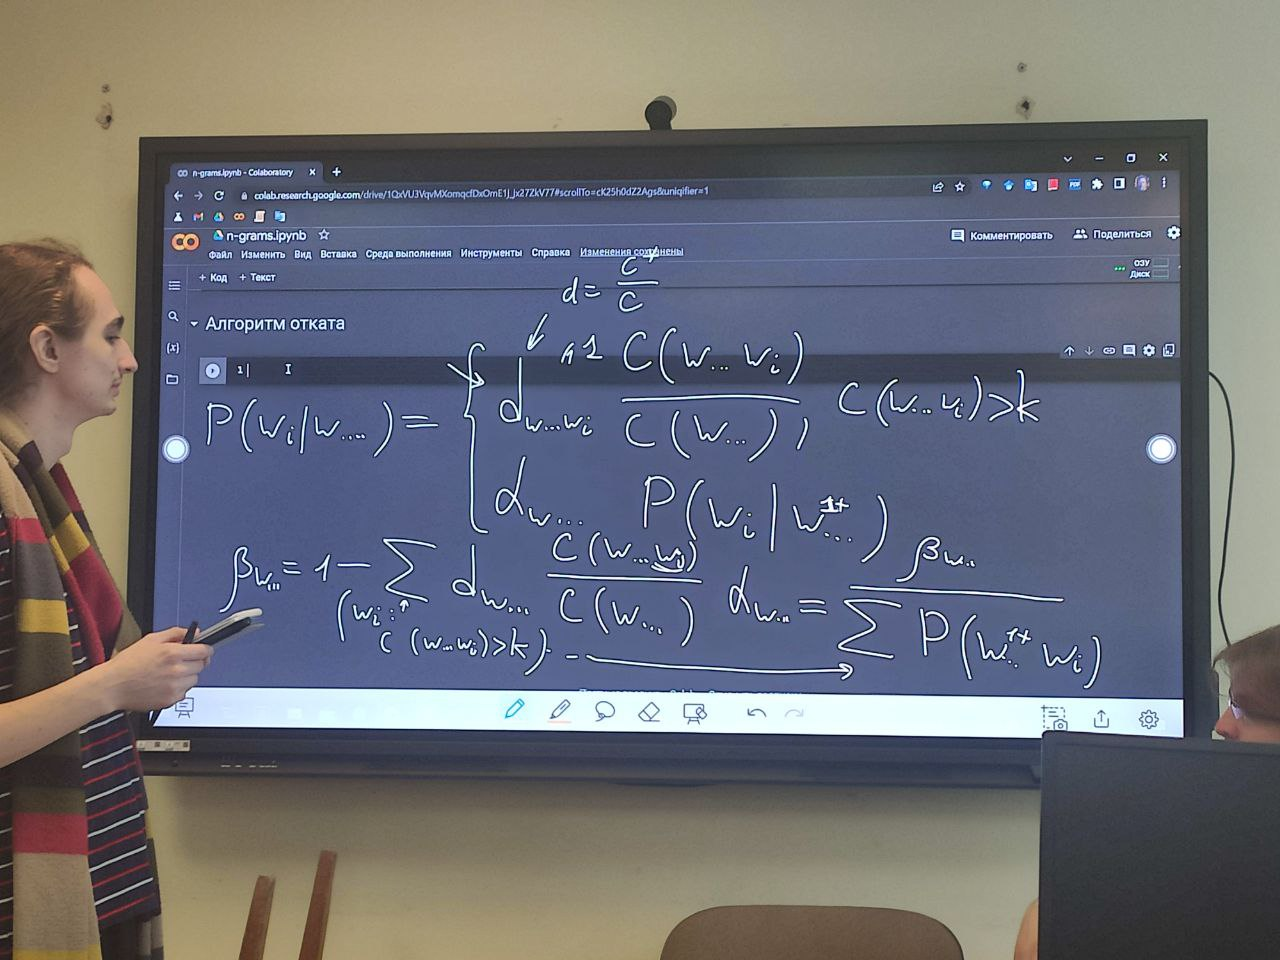

In [ ]:
uni = list(unigrams.keys())
bi = list(bigrams.keys())
tri = list(trigrams.keys())
# bi
all_ngrams = uni + bi
tri_and_bi = bi + tri
print(all_ngrams)

['красновато', 'шутку', 'были', 'не', 'всегда', 'сочувствие', 'тебе', 'виктора', 'мы', 'нравилась', 'странным', 'давление', 'а', 'стороны', 'есть', 'тех', 'тесть', 'РІ', 'знал', 'сестре', 'качествах', 'разорился', 'как-то', 'дорогу', 'схватил', 'каком-то', 'РѕРЅР°', 'вдохновляло', 'почти', 'сравнивать', 'ей-', 'повернулась', 'том', 'хотят', 'рисунком', 'колунами', 'легким', 'заскочил', 'им', 'симпатию', 'глаз', 'испытывала', 'этаж', 'дают', 'руки', 'сквозь', 'надвигавшуюся', 'это', 'рыжая', 'засияли', 'прежняя', 'гадость', 'федоровна', 'нужно', 'РіРѕРґ', 'алексеевичем', 'смотрели', 'этого', 'конечно', 'обеда', 'шептать', 'какой-то', 'поздно', 'телефоны', 'встречаться', 'отвечают', 'блеска', 'меня', 'и', 'безнадежен', 'поверь', 'с', 'лет', 'можете', 'слез', 'школу', 'удар', 'дачу', 'сразу', 'глаза', 'быть', 'крикнула', 'таня', 'лора', 'произнесла', 'лежали', 'хотел', 'близорукие', 'спиной', 'бородкой', 'видел', 'поехать', 'бюсте', 'бы', 'чем-то', 'понимал', 'здоровье', 'частица', 'давно

In [ ]:
k = 0

In [ ]:
bigrams_and_trigrams = triples + doubles
unigrams_and_bigrams = wordlist + doubles

In [ ]:
betas = {}
for ngram in all_ngrams:
  variable = 0
  ngram = ngram.split()
  if len(ngram) == 1:
    for n1g in doubles:
      n1g = n1g.split()
      if n1g[0] == ngram:
        n1g = " ".join(n1g)
        variable += bigrams_and_trigrams.count(n1g)
    ngram = " ".join(ngram)
    betas[ngram[0]] = 1 - variable/unigrams_and_bigrams.count(ngram[0])
  ngram = ngram.split()
  if len(ngram) == 2:
    for n1g in triples:
      n1g = n1g.split()
      if n1g[0:1] == ngram.split():
        n1g = " ".join(n1g)
        variable += bigrams_and_trigrams.count(n1g)
    ngram = " ".join(ngram)
    betas[ngram] = 1 - variable/unigrams_and_bigrams.count(ngram)
  

betas

In [ ]:
betas = {ngram: 1 - sum([1 * (all_ngrams.count(ngram)/all_ngrams.count(ngram))]) for ngram in all_ngrams}